In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
# Portfolio Stock Selection
pfolio_assets = ["F", "GOOG", "amzn"]
print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 3


In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: F
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High    Low  Close      Volume
Date                                              
2014-01-02  15.42  15.45  15.28  15.44  31528500.0
2014-01-03  15.52  15.64  15.30  15.51  46122300.0
2014-01-06  15.72  15.76  15.52  15.58  42657600.0
2014-01-07  15.73  15.74  15.35  15.38  54476300.0
2014-01-08  15.60  15.71  15.51  15.54  48448300.0
2014-01-09  15.83  16.02  15.77  15.84  67836500.0
2014-01-10  16.01  16.11  15.94  16.07  44984000.0
2014-01-13  16.37  16.53  16.08  16.11  57566400.0
2014-01-14  16.31  16.43  16.17  16.40  44039200.0
2014-01-15  16.37  16.73  16.35  16.70  64118200.0 

-----------------------------------------------------------------

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: GOOG
<Quandl API Call> [2] Stock Symbol: amzn

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,F,GOOG,amzn
Date,,,
2014-03-27,15.25,558.46,338.470
2014-03-28,15.45,559.99,338.290
2014-03-31,15.60,556.97,336.365
2014-04-01,16.32,567.16,342.990
2014-04-02,16.46,567.00,341.960
2014-04-03,16.39,569.74,333.620
2014-04-04,16.13,543.14,323.000
2014-04-07,15.94,538.15,317.760
2014-04-08,16.10,554.90,327.070


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

F       1006
GOOG    1006
amzn    1006
dtype: int64

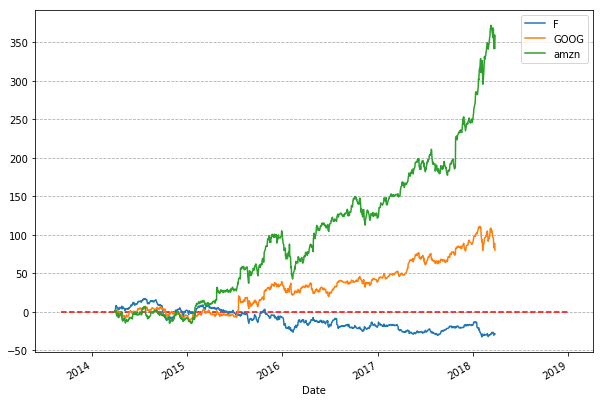

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = ((portfolio/portfolio.iloc[0] * 100) - 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")
plt.hlines(0, "2013-09-01", "2019-01-01", linestyle="dashed", color="red")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,F,GOOG,amzn
Date,,,
2014-03-28,0.013030,0.002736,-0.000532
2014-03-31,0.009662,-0.005408,-0.005707
2014-04-01,0.045120,0.018130,0.019504
2014-04-02,0.008542,-0.000282,-0.003008
2014-04-03,-0.004262,0.004821,-0.024691
2014-04-04,-0.015991,-0.047813,-0.032350
2014-04-07,-0.011849,-0.009230,-0.016356
2014-04-08,0.009988,0.030651,0.028878
2014-04-09,-0.016281,0.016515,0.014373


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

F      -0.085139
GOOG    0.146184
amzn    0.369855
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,F,GOOG,amzn
F,0.052157,0.016806,0.018396
GOOG,0.016806,0.050542,0.038869
amzn,0.018396,0.038869,0.083850


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,F,GOOG,amzn
F,1.000000,0.327334,0.278170
GOOG,0.327334,1.000000,0.597074
amzn,0.278170,0.597074,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [13]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'F': 0.603, 'GOOG': 0.2974, 'amzn': 0.0997, 'RTN': 0.029, 'VOL': 0.1866, 'Sharpe': -0.3699} 


 {'F': 0.5524, 'GOOG': 0.2132, 'amzn': 0.2344, 'RTN': 0.0708, 'VOL': 0.1882, 'Sharpe': -0.1444} 


 {'F': 0.3151, 'GOOG': 0.145, 'amzn': 0.5399, 'RTN': 0.1941, 'VOL': 0.2111, 'Sharpe': 0.455} 


 {'F': 0.3999, 'GOOG': 0.587, 'amzn': 0.0131, 'RTN': 0.0566, 'VOL': 0.1856, 'Sharpe': -0.223} 


 {'F': 0.072, 'GOOG': 0.7696, 'amzn': 0.1584, 'RTN': 0.165, 'VOL': 0.2099, 'Sharpe': 0.319} 


 {'F': 0.4251, 'GOOG': 0.2131, 'amzn': 0.3618, 'RTN': 0.1288, 'VOL': 0.1934, 'Sharpe': 0.1591} 


 {'F': 0.0131, 'GOOG': 0.3968, 'amzn': 0.5901, 'RTN': 0.2751, 'VOL': 0.2363, 'Sharpe': 0.7497} 


 {'F': 0.0971, 'GOOG': 0.4886, 'amzn': 0.4143, 'RTN': 0.2164, 'VOL': 0.2139, 'Sharpe': 0.5535} 


 {'F': 0.387, 'GOOG': 0.5664, 'amzn': 0.0465, 'RTN': 0.0671, 'VOL': 0.1852, 'Sharpe': -0.1671} 


 {'F': 0.5336, 'GOOG': 0.0599, 'amzn': 0.4066, 'RTN': 0.1137, 'VOL': 0.1996, 'Sharpe': 0.0786} 


 {'F': 0.1865, 'GOOG': 0.


 {'F': 0.3497, 'GOOG': 0.5123, 'amzn': 0.138, 'RTN': 0.0962, 'VOL': 0.1858, 'Sharpe': -0.0098} 


 {'F': 0.0952, 'GOOG': 0.4249, 'amzn': 0.4799, 'RTN': 0.2315, 'VOL': 0.2186, 'Sharpe': 0.6106} 


 {'F': 0.2089, 'GOOG': 0.1796, 'amzn': 0.6115, 'RTN': 0.2346, 'VOL': 0.2231, 'Sharpe': 0.6126} 


 {'F': 0.3205, 'GOOG': 0.0078, 'amzn': 0.6717, 'RTN': 0.2223, 'VOL': 0.2272, 'Sharpe': 0.5471} 


 {'F': 0.1494, 'GOOG': 0.3904, 'amzn': 0.4602, 'RTN': 0.2146, 'VOL': 0.2123, 'Sharpe': 0.549} 


 {'F': 0.5726, 'GOOG': 0.3101, 'amzn': 0.1173, 'RTN': 0.04, 'VOL': 0.1854, 'Sharpe': -0.313} 


 {'F': 0.3734, 'GOOG': 0.2556, 'amzn': 0.371, 'RTN': 0.1428, 'VOL': 0.1944, 'Sharpe': 0.2304} 


 {'F': 0.3822, 'GOOG': 0.1345, 'amzn': 0.4833, 'RTN': 0.1659, 'VOL': 0.2042, 'Sharpe': 0.3324} 


 {'F': 0.0646, 'GOOG': 0.0342, 'amzn': 0.9012, 'RTN': 0.3328, 'VOL': 0.2702, 'Sharpe': 0.8691} 


 {'F': 0.3539, 'GOOG': 0.5188, 'amzn': 0.1273, 'RTN': 0.0928, 'VOL': 0.1856, 'Sharpe': -0.028} 


 {'F': 0.3541, 'GOOG': 


 {'F': 0.4196, 'GOOG': 0.434, 'amzn': 0.1464, 'RTN': 0.0819, 'VOL': 0.1839, 'Sharpe': -0.0878} 


 {'F': 0.5672, 'GOOG': 0.412, 'amzn': 0.0208, 'RTN': 0.0196, 'VOL': 0.1853, 'Sharpe': -0.4228} 


 {'F': 0.2837, 'GOOG': 0.7101, 'amzn': 0.0062, 'RTN': 0.082, 'VOL': 0.192, 'Sharpe': -0.0836} 


 {'F': 0.2934, 'GOOG': 0.3146, 'amzn': 0.392, 'RTN': 0.166, 'VOL': 0.1982, 'Sharpe': 0.3429} 


 {'F': 0.0829, 'GOOG': 0.0951, 'amzn': 0.822, 'RTN': 0.3109, 'VOL': 0.2575, 'Sharpe': 0.8265} 


 {'F': 0.5646, 'GOOG': 0.0017, 'amzn': 0.4337, 'RTN': 0.1126, 'VOL': 0.2037, 'Sharpe': 0.0715} 


 {'F': 0.1473, 'GOOG': 0.762, 'amzn': 0.0907, 'RTN': 0.1324, 'VOL': 0.202, 'Sharpe': 0.1703} 


 {'F': 0.3798, 'GOOG': 0.047, 'amzn': 0.5733, 'RTN': 0.1866, 'VOL': 0.2142, 'Sharpe': 0.4134} 


 {'F': 0.4075, 'GOOG': 0.4205, 'amzn': 0.172, 'RTN': 0.0904, 'VOL': 0.1845, 'Sharpe': -0.0413} 


 {'F': 0.391, 'GOOG': 0.5038, 'amzn': 0.1052, 'RTN': 0.0793, 'VOL': 0.1843, 'Sharpe': -0.1015} 


 {'F': 0.3211, 'GOOG': 0.3


 {'F': 0.1037, 'GOOG': 0.625, 'amzn': 0.2714, 'RTN': 0.1829, 'VOL': 0.2071, 'Sharpe': 0.41} 


 {'F': 0.3515, 'GOOG': 0.3816, 'amzn': 0.267, 'RTN': 0.1246, 'VOL': 0.1888, 'Sharpe': 0.1408} 


 {'F': 0.3438, 'GOOG': 0.1079, 'amzn': 0.5483, 'RTN': 0.1893, 'VOL': 0.2115, 'Sharpe': 0.4316} 


 {'F': 0.1642, 'GOOG': 0.2798, 'amzn': 0.556, 'RTN': 0.2326, 'VOL': 0.2197, 'Sharpe': 0.6124} 


 {'F': 0.2894, 'GOOG': 0.1233, 'amzn': 0.5873, 'RTN': 0.2106, 'VOL': 0.2171, 'Sharpe': 0.5186} 


 {'F': 0.0473, 'GOOG': 0.4428, 'amzn': 0.5099, 'RTN': 0.2493, 'VOL': 0.2258, 'Sharpe': 0.6701} 


 {'F': 0.0854, 'GOOG': 0.0233, 'amzn': 0.8913, 'RTN': 0.3258, 'VOL': 0.2674, 'Sharpe': 0.8519} 


 {'F': 0.2025, 'GOOG': 0.5063, 'amzn': 0.2912, 'RTN': 0.1645, 'VOL': 0.1982, 'Sharpe': 0.3355} 


 {'F': 0.0646, 'GOOG': 0.6054, 'amzn': 0.33, 'RTN': 0.205, 'VOL': 0.2133, 'Sharpe': 0.5018} 


 {'F': 0.4932, 'GOOG': 0.1342, 'amzn': 0.3726, 'RTN': 0.1154, 'VOL': 0.1952, 'Sharpe': 0.0893} 


 {'F': 0.3949, 'GOOG': 0.42

 {'F': 0.4919, 'GOOG': 0.1282, 'amzn': 0.3798, 'RTN': 0.1173, 'VOL': 0.1958, 'Sharpe': 0.0988} 


 {'F': 0.5874, 'GOOG': 0.0173, 'amzn': 0.3953, 'RTN': 0.0987, 'VOL': 0.2013, 'Sharpe': 0.0036} 


 {'F': 0.4266, 'GOOG': 0.4584, 'amzn': 0.1151, 'RTN': 0.0732, 'VOL': 0.1836, 'Sharpe': -0.1349} 


 {'F': 0.5653, 'GOOG': 0.3622, 'amzn': 0.0724, 'RTN': 0.0316, 'VOL': 0.1849, 'Sharpe': -0.3592} 


 {'F': 0.4361, 'GOOG': 0.1935, 'amzn': 0.3704, 'RTN': 0.1282, 'VOL': 0.1941, 'Sharpe': 0.1554} 


 {'F': 0.2176, 'GOOG': 0.4587, 'amzn': 0.3237, 'RTN': 0.1683, 'VOL': 0.1984, 'Sharpe': 0.3541} 


 {'F': 0.3471, 'GOOG': 0.2765, 'amzn': 0.3764, 'RTN': 0.1501, 'VOL': 0.1953, 'Sharpe': 0.2667} 


 {'F': 0.2496, 'GOOG': 0.7047, 'amzn': 0.0457, 'RTN': 0.0987, 'VOL': 0.1933, 'Sharpe': 0.0034} 


 {'F': 0.4239, 'GOOG': 0.3024, 'amzn': 0.2736, 'RTN': 0.1093, 'VOL': 0.1878, 'Sharpe': 0.0603} 


 {'F': 0.2049, 'GOOG': 0.3855, 'amzn': 0.4096, 'RTN': 0.1904, 'VOL': 0.2044, 'Sharpe': 0.452} 


 {'F': 0.765, 'GOOG


 {'F': 0.6079, 'GOOG': 0.1919, 'amzn': 0.2002, 'RTN': 0.0503, 'VOL': 0.1894, 'Sharpe': -0.2516} 


 {'F': 0.6074, 'GOOG': 0.2516, 'amzn': 0.141, 'RTN': 0.0372, 'VOL': 0.1875, 'Sharpe': -0.3242} 


 {'F': 0.3284, 'GOOG': 0.3417, 'amzn': 0.3299, 'RTN': 0.144, 'VOL': 0.1928, 'Sharpe': 0.2386} 


 {'F': 0.1722, 'GOOG': 0.548, 'amzn': 0.2798, 'RTN': 0.1689, 'VOL': 0.2004, 'Sharpe': 0.354} 


 {'F': 0.1556, 'GOOG': 0.4779, 'amzn': 0.3664, 'RTN': 0.1921, 'VOL': 0.2056, 'Sharpe': 0.4578} 


 {'F': 0.1412, 'GOOG': 0.5388, 'amzn': 0.32, 'RTN': 0.1851, 'VOL': 0.2047, 'Sharpe': 0.4254} 


 {'F': 0.333, 'GOOG': 0.1986, 'amzn': 0.4684, 'RTN': 0.1739, 'VOL': 0.2034, 'Sharpe': 0.3732} 


 {'F': 0.3844, 'GOOG': 0.5147, 'amzn': 0.1009, 'RTN': 0.0798, 'VOL': 0.1846, 'Sharpe': -0.0984} 


 {'F': 0.3929, 'GOOG': 0.4632, 'amzn': 0.1439, 'RTN': 0.0875, 'VOL': 0.1844, 'Sharpe': -0.057} 


 {'F': 0.4281, 'GOOG': 0.3261, 'amzn': 0.2458, 'RTN': 0.1021, 'VOL': 0.1865, 'Sharpe': 0.0222} 


 {'F': 0.4092, 'GOOG': 

 {'F': 0.3399, 'GOOG': 0.2566, 'amzn': 0.4036, 'RTN': 0.1578, 'VOL': 0.1976, 'Sharpe': 0.3028} 


 {'F': 0.3197, 'GOOG': 0.5043, 'amzn': 0.176, 'RTN': 0.1116, 'VOL': 0.1875, 'Sharpe': 0.0726} 


 {'F': 0.2569, 'GOOG': 0.2298, 'amzn': 0.5134, 'RTN': 0.2016, 'VOL': 0.2103, 'Sharpe': 0.4926} 


 {'F': 0.377, 'GOOG': 0.362, 'amzn': 0.261, 'RTN': 0.1173, 'VOL': 0.1879, 'Sharpe': 0.1029} 


 {'F': 0.1992, 'GOOG': 0.7708, 'amzn': 0.0299, 'RTN': 0.1068, 'VOL': 0.1984, 'Sharpe': 0.0443} 


 {'F': 0.5416, 'GOOG': 0.0551, 'amzn': 0.4033, 'RTN': 0.1111, 'VOL': 0.1996, 'Sharpe': 0.0656} 


 {'F': 0.3783, 'GOOG': 0.3877, 'amzn': 0.234, 'RTN': 0.111, 'VOL': 0.1868, 'Sharpe': 0.0696} 


 {'F': 0.6042, 'GOOG': 0.0125, 'amzn': 0.3833, 'RTN': 0.0922, 'VOL': 0.2013, 'Sharpe': -0.029} 


 {'F': 0.5334, 'GOOG': 0.4152, 'amzn': 0.0514, 'RTN': 0.0343, 'VOL': 0.1841, 'Sharpe': -0.3461} 


 {'F': 0.2568, 'GOOG': 0.6292, 'amzn': 0.114, 'RTN': 0.1123, 'VOL': 0.1914, 'Sharpe': 0.0746} 


 {'F': 0.3049, 'GOOG': 0.3


 {'F': 0.206, 'GOOG': 0.408, 'amzn': 0.386, 'RTN': 0.1849, 'VOL': 0.2028, 'Sharpe': 0.4284} 


 {'F': 0.0811, 'GOOG': 0.3793, 'amzn': 0.5395, 'RTN': 0.2481, 'VOL': 0.2249, 'Sharpe': 0.6674} 


 {'F': 0.331, 'GOOG': 0.5918, 'amzn': 0.0772, 'RTN': 0.0869, 'VOL': 0.1871, 'Sharpe': -0.0595} 


 {'F': 0.5923, 'GOOG': 0.3932, 'amzn': 0.0145, 'RTN': 0.0124, 'VOL': 0.1863, 'Sharpe': -0.4594} 


 {'F': 0.0656, 'GOOG': 0.0554, 'amzn': 0.8791, 'RTN': 0.3276, 'VOL': 0.2668, 'Sharpe': 0.8606} 


 {'F': 0.386, 'GOOG': 0.2838, 'amzn': 0.3302, 'RTN': 0.1308, 'VOL': 0.1914, 'Sharpe': 0.1711} 


 {'F': 0.156, 'GOOG': 0.4335, 'amzn': 0.4105, 'RTN': 0.2019, 'VOL': 0.2082, 'Sharpe': 0.499} 


 {'F': 0.374, 'GOOG': 0.3788, 'amzn': 0.2472, 'RTN': 0.115, 'VOL': 0.1874, 'Sharpe': 0.0905} 


 {'F': 0.3907, 'GOOG': 0.3972, 'amzn': 0.2121, 'RTN': 0.1032, 'VOL': 0.1858, 'Sharpe': 0.0282} 


 {'F': 0.5106, 'GOOG': 0.4559, 'amzn': 0.0335, 'RTN': 0.0356, 'VOL': 0.184, 'Sharpe': -0.3394} 


 {'F': 0.8087, 'GOOG': 0.1


 {'F': 0.1157, 'GOOG': 0.6148, 'amzn': 0.2695, 'RTN': 0.1797, 'VOL': 0.2057, 'Sharpe': 0.3972} 


 {'F': 0.5905, 'GOOG': 0.1781, 'amzn': 0.2314, 'RTN': 0.0613, 'VOL': 0.1899, 'Sharpe': -0.1931} 


 {'F': 0.5121, 'GOOG': 0.105, 'amzn': 0.3829, 'RTN': 0.1134, 'VOL': 0.1967, 'Sharpe': 0.0782} 


 {'F': 0.3819, 'GOOG': 0.533, 'amzn': 0.085, 'RTN': 0.0769, 'VOL': 0.1848, 'Sharpe': -0.1144} 


 {'F': 0.3059, 'GOOG': 0.5004, 'amzn': 0.1937, 'RTN': 0.1187, 'VOL': 0.1885, 'Sharpe': 0.11} 


 {'F': 0.1907, 'GOOG': 0.4081, 'amzn': 0.4012, 'RTN': 0.1918, 'VOL': 0.2049, 'Sharpe': 0.4579} 


 {'F': 0.3134, 'GOOG': 0.3494, 'amzn': 0.3372, 'RTN': 0.1491, 'VOL': 0.1938, 'Sharpe': 0.2637} 


 {'F': 0.4887, 'GOOG': 0.1297, 'amzn': 0.3816, 'RTN': 0.1185, 'VOL': 0.1958, 'Sharpe': 0.1046} 


 {'F': 0.2299, 'GOOG': 0.3104, 'amzn': 0.4596, 'RTN': 0.1958, 'VOL': 0.2067, 'Sharpe': 0.4732} 


 {'F': 0.1138, 'GOOG': 0.495, 'amzn': 0.3912, 'RTN': 0.2073, 'VOL': 0.2109, 'Sharpe': 0.5185} 


 {'F': 0.4436, 'GOOG': 


 {'F': 0.0534, 'GOOG': 0.4666, 'amzn': 0.48, 'RTN': 0.2412, 'VOL': 0.2229, 'Sharpe': 0.6425} 


 {'F': 0.4019, 'GOOG': 0.3552, 'amzn': 0.2429, 'RTN': 0.1075, 'VOL': 0.1867, 'Sharpe': 0.051} 


 {'F': 0.4251, 'GOOG': 0.2372, 'amzn': 0.3377, 'RTN': 0.1234, 'VOL': 0.1916, 'Sharpe': 0.1324} 


 {'F': 0.2512, 'GOOG': 0.1676, 'amzn': 0.5812, 'RTN': 0.2181, 'VOL': 0.2177, 'Sharpe': 0.5516} 


 {'F': 0.0888, 'GOOG': 0.2913, 'amzn': 0.6199, 'RTN': 0.2643, 'VOL': 0.2321, 'Sharpe': 0.7166} 


 {'F': 0.1867, 'GOOG': 0.0098, 'amzn': 0.8035, 'RTN': 0.2827, 'VOL': 0.2493, 'Sharpe': 0.7409} 


 {'F': 0.4149, 'GOOG': 0.1504, 'amzn': 0.4346, 'RTN': 0.1474, 'VOL': 0.1994, 'Sharpe': 0.2478} 


 {'F': 0.6955, 'GOOG': 0.0301, 'amzn': 0.2744, 'RTN': 0.0467, 'VOL': 0.1999, 'Sharpe': -0.2567} 


 {'F': 0.6775, 'GOOG': 0.0555, 'amzn': 0.2671, 'RTN': 0.0492, 'VOL': 0.1979, 'Sharpe': -0.2466} 


 {'F': 0.2453, 'GOOG': 0.4989, 'amzn': 0.2558, 'RTN': 0.1467, 'VOL': 0.1938, 'Sharpe': 0.2511} 


 {'F': 0.2284, 'GOOG


 {'F': 0.3523, 'GOOG': 0.3433, 'amzn': 0.3044, 'RTN': 0.1328, 'VOL': 0.1906, 'Sharpe': 0.1825} 


 {'F': 0.3737, 'GOOG': 0.4914, 'amzn': 0.1349, 'RTN': 0.0899, 'VOL': 0.1849, 'Sharpe': -0.0437} 


 {'F': 0.5779, 'GOOG': 0.2507, 'amzn': 0.1714, 'RTN': 0.0509, 'VOL': 0.1868, 'Sharpe': -0.2523} 


 {'F': 0.3398, 'GOOG': 0.4156, 'amzn': 0.2446, 'RTN': 0.1223, 'VOL': 0.1884, 'Sharpe': 0.129} 


 {'F': 0.2567, 'GOOG': 0.3955, 'amzn': 0.3478, 'RTN': 0.1646, 'VOL': 0.1972, 'Sharpe': 0.3377} 


 {'F': 0.0976, 'GOOG': 0.3396, 'amzn': 0.5629, 'RTN': 0.2495, 'VOL': 0.2256, 'Sharpe': 0.6717} 


 {'F': 0.13, 'GOOG': 0.1404, 'amzn': 0.7296, 'RTN': 0.2793, 'VOL': 0.242, 'Sharpe': 0.7491} 


 {'F': 0.2844, 'GOOG': 0.0381, 'amzn': 0.6775, 'RTN': 0.2319, 'VOL': 0.2286, 'Sharpe': 0.586} 


 {'F': 0.2968, 'GOOG': 0.264, 'amzn': 0.4392, 'RTN': 0.1758, 'VOL': 0.2018, 'Sharpe': 0.3853} 


 {'F': 0.1065, 'GOOG': 0.5054, 'amzn': 0.388, 'RTN': 0.2083, 'VOL': 0.2114, 'Sharpe': 0.5218} 


 {'F': 0.1004, 'GOOG': 0

 {'F': 0.6329, 'GOOG': 0.2129, 'amzn': 0.1541, 'RTN': 0.0343, 'VOL': 0.1893, 'Sharpe': -0.3367} 


 {'F': 0.3256, 'GOOG': 0.5209, 'amzn': 0.1536, 'RTN': 0.1052, 'VOL': 0.187, 'Sharpe': 0.0386} 


 {'F': 0.2202, 'GOOG': 0.122, 'amzn': 0.6578, 'RTN': 0.2424, 'VOL': 0.2281, 'Sharpe': 0.6329} 


 {'F': 0.3543, 'GOOG': 0.1912, 'amzn': 0.4544, 'RTN': 0.1659, 'VOL': 0.2017, 'Sharpe': 0.3365} 


 {'F': 0.5332, 'GOOG': 0.1426, 'amzn': 0.3242, 'RTN': 0.0954, 'VOL': 0.1928, 'Sharpe': -0.0137} 


 {'F': 0.7341, 'GOOG': 0.139, 'amzn': 0.1268, 'RTN': 0.0047, 'VOL': 0.1966, 'Sharpe': -0.4743} 


 {'F': 0.2059, 'GOOG': 0.2113, 'amzn': 0.5827, 'RTN': 0.2289, 'VOL': 0.22, 'Sharpe': 0.595} 


 {'F': 0.0432, 'GOOG': 0.6055, 'amzn': 0.3513, 'RTN': 0.2148, 'VOL': 0.2167, 'Sharpe': 0.539} 


 {'F': 0.4063, 'GOOG': 0.1047, 'amzn': 0.489, 'RTN': 0.1616, 'VOL': 0.2048, 'Sharpe': 0.3105} 


 {'F': 0.3257, 'GOOG': 0.5999, 'amzn': 0.0744, 'RTN': 0.0875, 'VOL': 0.1874, 'Sharpe': -0.0561} 


 {'F': 0.1733, 'GOOG': 0


 {'F': 0.0558, 'GOOG': 0.4167, 'amzn': 0.5275, 'RTN': 0.2513, 'VOL': 0.2263, 'Sharpe': 0.6772} 


 {'F': 0.0134, 'GOOG': 0.3257, 'amzn': 0.6609, 'RTN': 0.2909, 'VOL': 0.2433, 'Sharpe': 0.7928} 


 {'F': 0.2138, 'GOOG': 0.0599, 'amzn': 0.7263, 'RTN': 0.2592, 'VOL': 0.2373, 'Sharpe': 0.6791} 


 {'F': 0.6181, 'GOOG': 0.208, 'amzn': 0.1739, 'RTN': 0.0421, 'VOL': 0.189, 'Sharpe': -0.2956} 


 {'F': 0.4815, 'GOOG': 0.3591, 'amzn': 0.1594, 'RTN': 0.0704, 'VOL': 0.1839, 'Sharpe': -0.1498} 


 {'F': 0.4294, 'GOOG': 0.3122, 'amzn': 0.2584, 'RTN': 0.1047, 'VOL': 0.1871, 'Sharpe': 0.0356} 


 {'F': 0.467, 'GOOG': 0.0633, 'amzn': 0.4697, 'RTN': 0.1432, 'VOL': 0.2036, 'Sharpe': 0.2221} 


 {'F': 0.5642, 'GOOG': 0.2952, 'amzn': 0.1406, 'RTN': 0.0471, 'VOL': 0.1855, 'Sharpe': -0.2743} 


 {'F': 0.1626, 'GOOG': 0.4449, 'amzn': 0.3925, 'RTN': 0.1964, 'VOL': 0.2065, 'Sharpe': 0.4762} 


 {'F': 0.2274, 'GOOG': 0.4868, 'amzn': 0.2857, 'RTN': 0.1575, 'VOL': 0.1961, 'Sharpe': 0.3034} 


 {'F': 0.1559, 'GOO

 {'F': 0.4758, 'GOOG': 0.4641, 'amzn': 0.06, 'RTN': 0.0495, 'VOL': 0.1834, 'Sharpe': -0.2642} 


 {'F': 0.3386, 'GOOG': 0.1678, 'amzn': 0.4935, 'RTN': 0.1782, 'VOL': 0.2057, 'Sharpe': 0.39} 


 {'F': 0.1767, 'GOOG': 0.0549, 'amzn': 0.7683, 'RTN': 0.2772, 'VOL': 0.2447, 'Sharpe': 0.7321} 


 {'F': 0.4137, 'GOOG': 0.4173, 'amzn': 0.169, 'RTN': 0.0883, 'VOL': 0.1843, 'Sharpe': -0.0528} 


 {'F': 0.1681, 'GOOG': 0.3624, 'amzn': 0.4696, 'RTN': 0.2123, 'VOL': 0.2116, 'Sharpe': 0.5403} 


 {'F': 0.3837, 'GOOG': 0.2326, 'amzn': 0.3837, 'RTN': 0.1432, 'VOL': 0.1952, 'Sharpe': 0.2318} 


 {'F': 0.3614, 'GOOG': 0.3635, 'amzn': 0.2751, 'RTN': 0.1241, 'VOL': 0.1889, 'Sharpe': 0.1382} 


 {'F': 0.3114, 'GOOG': 0.5789, 'amzn': 0.1097, 'RTN': 0.0987, 'VOL': 0.1878, 'Sharpe': 0.0036} 


 {'F': 0.2726, 'GOOG': 0.4868, 'amzn': 0.2406, 'RTN': 0.1369, 'VOL': 0.1915, 'Sharpe': 0.2033} 


 {'F': 0.1605, 'GOOG': 0.6434, 'amzn': 0.1961, 'RTN': 0.1529, 'VOL': 0.1998, 'Sharpe': 0.2748} 


 {'F': 0.4042, 'GOOG': 


 {'F': 0.1725, 'GOOG': 0.45, 'amzn': 0.3775, 'RTN': 0.1907, 'VOL': 0.2048, 'Sharpe': 0.4527} 


 {'F': 0.2248, 'GOOG': 0.0778, 'amzn': 0.6974, 'RTN': 0.2502, 'VOL': 0.233, 'Sharpe': 0.653} 


 {'F': 0.7327, 'GOOG': 0.1764, 'amzn': 0.0909, 'RTN': -0.003, 'VOL': 0.1957, 'Sharpe': -0.5159} 


 {'F': 0.5467, 'GOOG': 0.3318, 'amzn': 0.1215, 'RTN': 0.0469, 'VOL': 0.1846, 'Sharpe': -0.2768} 


 {'F': 0.1578, 'GOOG': 0.7745, 'amzn': 0.0677, 'RTN': 0.1248, 'VOL': 0.2014, 'Sharpe': 0.1331} 


 {'F': 0.3828, 'GOOG': 0.124, 'amzn': 0.4932, 'RTN': 0.168, 'VOL': 0.2052, 'Sharpe': 0.3409} 


 {'F': 0.4729, 'GOOG': 0.1379, 'amzn': 0.3892, 'RTN': 0.1238, 'VOL': 0.1961, 'Sharpe': 0.1318} 


 {'F': 0.4047, 'GOOG': 0.2419, 'amzn': 0.3534, 'RTN': 0.1316, 'VOL': 0.1928, 'Sharpe': 0.1743} 


 {'F': 0.2827, 'GOOG': 0.2071, 'amzn': 0.5102, 'RTN': 0.1949, 'VOL': 0.2089, 'Sharpe': 0.4638} 


 {'F': 0.12, 'GOOG': 0.8649, 'amzn': 0.0151, 'RTN': 0.1218, 'VOL': 0.2077, 'Sharpe': 0.1146} 


 {'F': 0.0671, 'GOOG': 0.

 {'F': 0.4369, 'GOOG': 0.087, 'amzn': 0.4762, 'RTN': 0.1516, 'VOL': 0.2037, 'Sharpe': 0.2632} 


 {'F': 0.7316, 'GOOG': 0.0234, 'amzn': 0.2451, 'RTN': 0.0318, 'VOL': 0.2015, 'Sharpe': -0.3287} 


 {'F': 0.6255, 'GOOG': 0.2207, 'amzn': 0.1538, 'RTN': 0.0359, 'VOL': 0.1889, 'Sharpe': -0.3288} 


 {'F': 0.3827, 'GOOG': 0.1621, 'amzn': 0.4552, 'RTN': 0.1595, 'VOL': 0.2014, 'Sharpe': 0.3052} 


 {'F': 0.2504, 'GOOG': 0.5356, 'amzn': 0.2139, 'RTN': 0.1361, 'VOL': 0.1923, 'Sharpe': 0.1981} 


 {'F': 0.1888, 'GOOG': 0.2397, 'amzn': 0.5715, 'RTN': 0.2303, 'VOL': 0.2197, 'Sharpe': 0.6022} 


 {'F': 0.2888, 'GOOG': 0.2339, 'amzn': 0.4773, 'RTN': 0.1861, 'VOL': 0.2055, 'Sharpe': 0.4288} 


 {'F': 0.2877, 'GOOG': 0.0548, 'amzn': 0.6576, 'RTN': 0.2267, 'VOL': 0.2259, 'Sharpe': 0.5699} 


 {'F': 0.2815, 'GOOG': 0.6506, 'amzn': 0.068, 'RTN': 0.0963, 'VOL': 0.1903, 'Sharpe': -0.0091} 


 {'F': 0.3809, 'GOOG': 0.4457, 'amzn': 0.1734, 'RTN': 0.0969, 'VOL': 0.1851, 'Sharpe': -0.0061} 


 {'F': 0.3272, 'GO


 {'F': 0.4699, 'GOOG': 0.176, 'amzn': 0.3541, 'RTN': 0.1167, 'VOL': 0.1932, 'Sharpe': 0.0967} 


 {'F': 0.0128, 'GOOG': 0.1353, 'amzn': 0.8518, 'RTN': 0.3337, 'VOL': 0.2668, 'Sharpe': 0.8835} 


 {'F': 0.4418, 'GOOG': 0.0216, 'amzn': 0.5366, 'RTN': 0.164, 'VOL': 0.2105, 'Sharpe': 0.3137} 


 {'F': 0.3555, 'GOOG': 0.2427, 'amzn': 0.4019, 'RTN': 0.1538, 'VOL': 0.1971, 'Sharpe': 0.2833} 


 {'F': 0.0562, 'GOOG': 0.3492, 'amzn': 0.5947, 'RTN': 0.2662, 'VOL': 0.2324, 'Sharpe': 0.7238} 


 {'F': 0.3251, 'GOOG': 0.3335, 'amzn': 0.3414, 'RTN': 0.1473, 'VOL': 0.1936, 'Sharpe': 0.2548} 


 {'F': 0.2074, 'GOOG': 0.548, 'amzn': 0.2446, 'RTN': 0.1529, 'VOL': 0.1963, 'Sharpe': 0.2797} 


 {'F': 0.3877, 'GOOG': 0.2128, 'amzn': 0.3995, 'RTN': 0.1459, 'VOL': 0.1964, 'Sharpe': 0.2436} 


 {'F': 0.2962, 'GOOG': 0.154, 'amzn': 0.5498, 'RTN': 0.2006, 'VOL': 0.2127, 'Sharpe': 0.4826} 


 {'F': 0.2672, 'GOOG': 0.5132, 'amzn': 0.2196, 'RTN': 0.1335, 'VOL': 0.1913, 'Sharpe': 0.1856} 


 {'F': 0.3738, 'GOOG': 

In [14]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,F,GOOG,RTN,Sharpe,VOL,amzn
0,0.6030,0.2974,0.0290,-0.3699,0.1866,0.0997
1,0.5524,0.2132,0.0708,-0.1444,0.1882,0.2344
2,0.3151,0.1450,0.1941,0.4550,0.2111,0.5399
3,0.3999,0.5870,0.0566,-0.2230,0.1856,0.0131
4,0.0720,0.7696,0.1650,0.3190,0.2099,0.1584


In [15]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,0.219439,0.146507,0.202030
std,0.326825,0.071331,0.016256
min,-0.758500,-0.069000,0.183200
25%,0.004825,0.098950,0.189675
50%,0.245350,0.146000,0.198200
75%,0.469450,0.196200,0.210000
max,0.932500,0.366000,0.287400


In [16]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [17]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,F,GOOG,amzn
Sharpe,RTN,VOL,,,
0.9325,0.3660,0.2874,0.0056,0.0058,0.9886
0.9002,0.3473,0.2769,0.0312,0.0376,0.9312
0.8885,0.3353,0.2671,0.0012,0.1520,0.8468
0.8883,0.3426,0.2754,0.0494,0.0213,0.9293
0.8835,0.3337,0.2668,0.0128,0.1353,0.8518
0.8820,0.3318,0.2650,0.0026,0.1650,0.8324
0.8775,0.3327,0.2674,0.0318,0.1017,0.8665
0.8774,0.3303,0.2647,0.0131,0.1504,0.8366
0.8734,0.3350,0.2713,0.0614,0.0311,0.9075


In [18]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,F,GOOG,amzn
Sharpe,RTN,VOL,,,
-0.6643,-0.0381,0.2049,0.8265,0.1427,0.0308
-0.6659,-0.0397,0.2067,0.8414,0.1192,0.0394
-0.6705,-0.0466,0.2156,0.9058,0.0191,0.0751
-0.6732,-0.0467,0.2149,0.9018,0.0279,0.0703
-0.6736,-0.0386,0.2029,0.8087,0.1811,0.0101
-0.6763,-0.0476,0.2152,0.9041,0.0270,0.0688
-0.6865,-0.0434,0.2059,0.8358,0.1472,0.0170
-0.7109,-0.0573,0.2185,0.9295,0.0191,0.0515
-0.7388,-0.0590,0.2126,0.8893,0.1083,0.0023


In [19]:
# Identify Minimum Variance Portfolio
mvp_vol = ranked_portfolios.reset_index()["VOL"].min()
#mvp_rtn = ranked_portfolios.reset_index().loc[]
mvp_vol

0.1832

In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

Text(0, 0.5, 'Expected Portfolio Return')

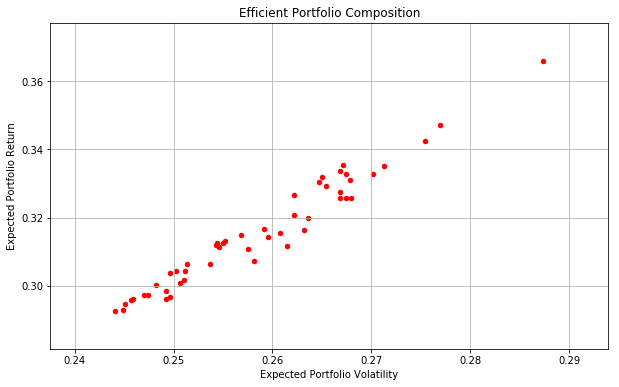

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.25)
#plt.ylim(-.1, .25)


Text(0, 0.5, 'Expected Portfolio Return')

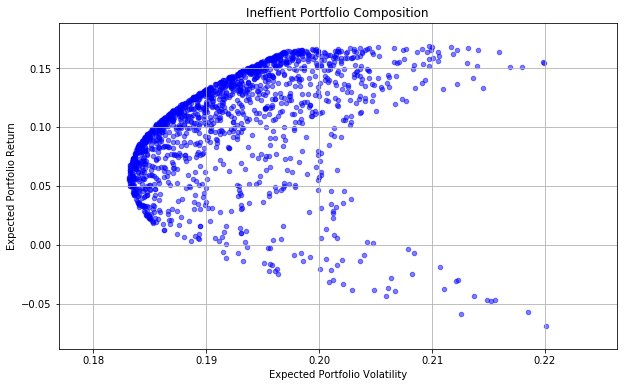

In [22]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.50)
#plt.ylim(-.1, .25)

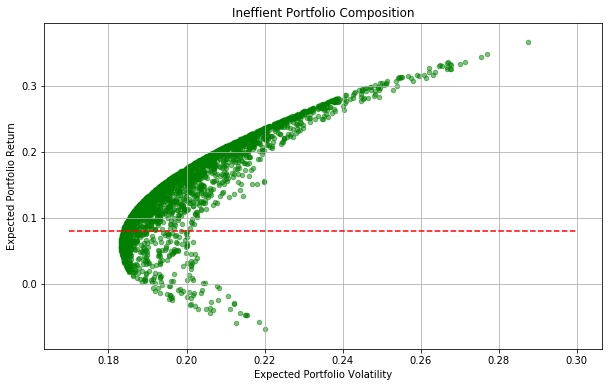

In [23]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.08, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.15,.30)
#plt.ylim(-.1, .5)